# DEA Notebook 

![alt text](../dea-gallery-crop.png "DEA")

### [DEA](https://dea.destine.eu/web) is a Content creation service and no-code platform for DestinE storytelling and data visualization

# Generate a geoJSON with the shape of NUTS region of your interest

This notebook guides you through the process of selecting a region from the NUTS shapefile and importing its geometry into the DEA platform as a GeoJSON file.

The NUTS (Nomenclature of Territorial Units for Statistics) is a standard hierarchical system developed by EUROSTAT to divide up the economic territory of the European Union for statistical and policy purposes. The dataset is provided by **GISCO** (Geographic Information System of the Commission) and can be downloaded from the official EUROSTAT portal:

https://ec.europa.eu/eurostat/web/gisco/geodata/statistical-units/territorial-units-statistics


### NUTS Hierarchy

The NUTS classification is structured into four hierarchical levels:

- **NUTS 0**: Country level (e.g., France, Austria)
- **NUTS 1**: Major socio-economic regions (e.g., Südösterreich)
- **NUTS 2**: Basic regions for the application of regional policies
- **NUTS 3**: Small regions for specific diagnoses (e.g., districts, provinces)


> **Note**: The NUTS boundaries are updated regularly, usually every 3–6 years, to reflect administrative changes or improve accuracy. Ensure that you download the **most recent version (e.g., NUTS 2024)** to match the latest statistical datasets.

### Format and Selection for DEA

To filter a specific region of interest and use it in DEA, follow these recommendations when downloading the dataset:

- **Version**: NUTS 2024 (or latest available)
- **Format**: ESRI **Shapefile (.shp)**
- **Geometry type**: **Polygon**
- **Scale**: Choose the **most detailed resolution available (01M)**  (This provides accurate borders for fine-scale analysis, but its size is higher)
- **Projection**: **EPSG:4326** (WGS84 latitude/longitude, required by most web mapping applications)

### Uploading the NUTS dataset to Insula

Once you have downloaded the NUTS dataset locally from the EUROSTAT website, make sure to **upload the entire folder** (including the `.shp`, `.dbf`, `.shx`, `.prj`, and other associated files) into your **Insula workspace**.

> The full NUTS folder must be available in the current working directory of this notebook in order for the code to run correctly.  
> You can do this by clicking on the folder icon in the left panel and dragging the files into it.

This ensures that all components of the shapefile are properly loaded when reading the data with GeoPandas.

### Filter the file as per the region of interest 
Once loaded in the environment, you can filter the shapefile to select a specific region (e.g., by `NUTS_ID` or `NUTS_NAME`) and convert it to GeoJSON format for ingestion into the DEA system.

> **Tip**: The GeoJSON you obtain from this process is not only usable within DEA, but can also be uploaded directly into the [Copernicus Data Space Browser](https://dataspace.copernicus.eu/browser) as an Area of Interest (AOI).  
> This allows you to visually select and download satellite data over your chosen region, enabling seamless integration between spatial analysis and EO data access.


### Load the module

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box

### Read the shapefile

In [3]:
# Path to the shapefile
shapefile_path = 'NUTS_RG_01M_2024_4326.shp/NUTS_RG_01M_2024_4326.shp'


# Load GeoDataFrame
gdf = gpd.read_file(shapefile_path)
print(gdf)

     NUTS_ID  LEVL_CODE CNTR_CODE       NAME_LATN       NUTS_NAME  MOUNT_TYPE  \
0      AT112          3        AT  Nordburgenland  Nordburgenland         NaN   
1      AT113          3        AT   Südburgenland   Südburgenland         NaN   
2      AL011          3        AL           Dibër           Dibër         NaN   
3      AL012          3        AL          Durrës          Durrës         NaN   
4      AL013          3        AL           Kukës           Kukës         NaN   
...      ...        ...       ...             ...             ...         ...   
1788      SE          0        SE         Sverige         Sverige         NaN   
1789      SI          0        SI       Slovenija       Slovenija         NaN   
1790      PT          0        PT        Portugal        Portugal         NaN   
1791      SK          0        SK       Slovensko       Slovensko         NaN   
1792      RO          0        RO         România         România         NaN   

      URBN_TYPE  COAST_TYPE

### Select the NUTS_ID of interest based on `NUTS_NAME`

You can filter the NUTS dataset using any of the available columns in the attribute table, depending on your needs.  
Some commonly used keys include:

- `NUTS_ID`: unique region identifier  
- `NUTS_NAME` or `NAME_LATN`: official region name  
- `LEVL_CODE`: level in the NUTS hierarchy (0 to 3)  
- `CNTR_CODE`: country code (e.g. AT, FR, IT)  
- `MOUNT_TYPE`, `URBN_TYPE`, `COAST_TYPE`: classification codes for mountain, urban, and coastal areas  

These attributes allow for flexible selection of regions, whether you're working at the national level or focusing on specific types of territories.

In this example, we filter the table using the `NUTS_NAME` to retrieve the boundaries of `Wien`.

In [4]:
selection = 'Wien'
selected_id = gdf[gdf['NUTS_NAME'] == selection].reset_index(drop=True)
selected_id

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,geometry
0,AT130,3,AT,Wien,Wien,NaN,NaN,NaN,"POLYGON ((16.43166 48.31833, 16.43749 48.31571..."
1,AT13,2,AT,Wien,Wien,NaN,NaN,NaN,"POLYGON ((16.43166 48.31833, 16.43749 48.31571..."


### Filter data and display it

You can filter the dataset using standard pandas or GeoPandas syntax, depending on the attribute(s) you're interested in.

Below is an example where we filter by `NUTS_ID`, selecting all regions whose ID contains `"AT13"` (which corresponds to a part of Austria).  
Additional conditions can be added to further refine the selection, such as filtering by `LEVL_CODE` to target a specific NUTS level.

  NUTS_ID  LEVL_CODE CNTR_CODE NAME_LATN NUTS_NAME  MOUNT_TYPE  URBN_TYPE  \
0   AT130          3        AT      Wien      Wien         NaN        NaN   
1    AT13          2        AT      Wien      Wien         NaN        NaN   

   COAST_TYPE                                           geometry  
0         NaN  POLYGON ((16.43166 48.31833, 16.43749 48.31571...  
1         NaN  POLYGON ((16.43166 48.31833, 16.43749 48.31571...  


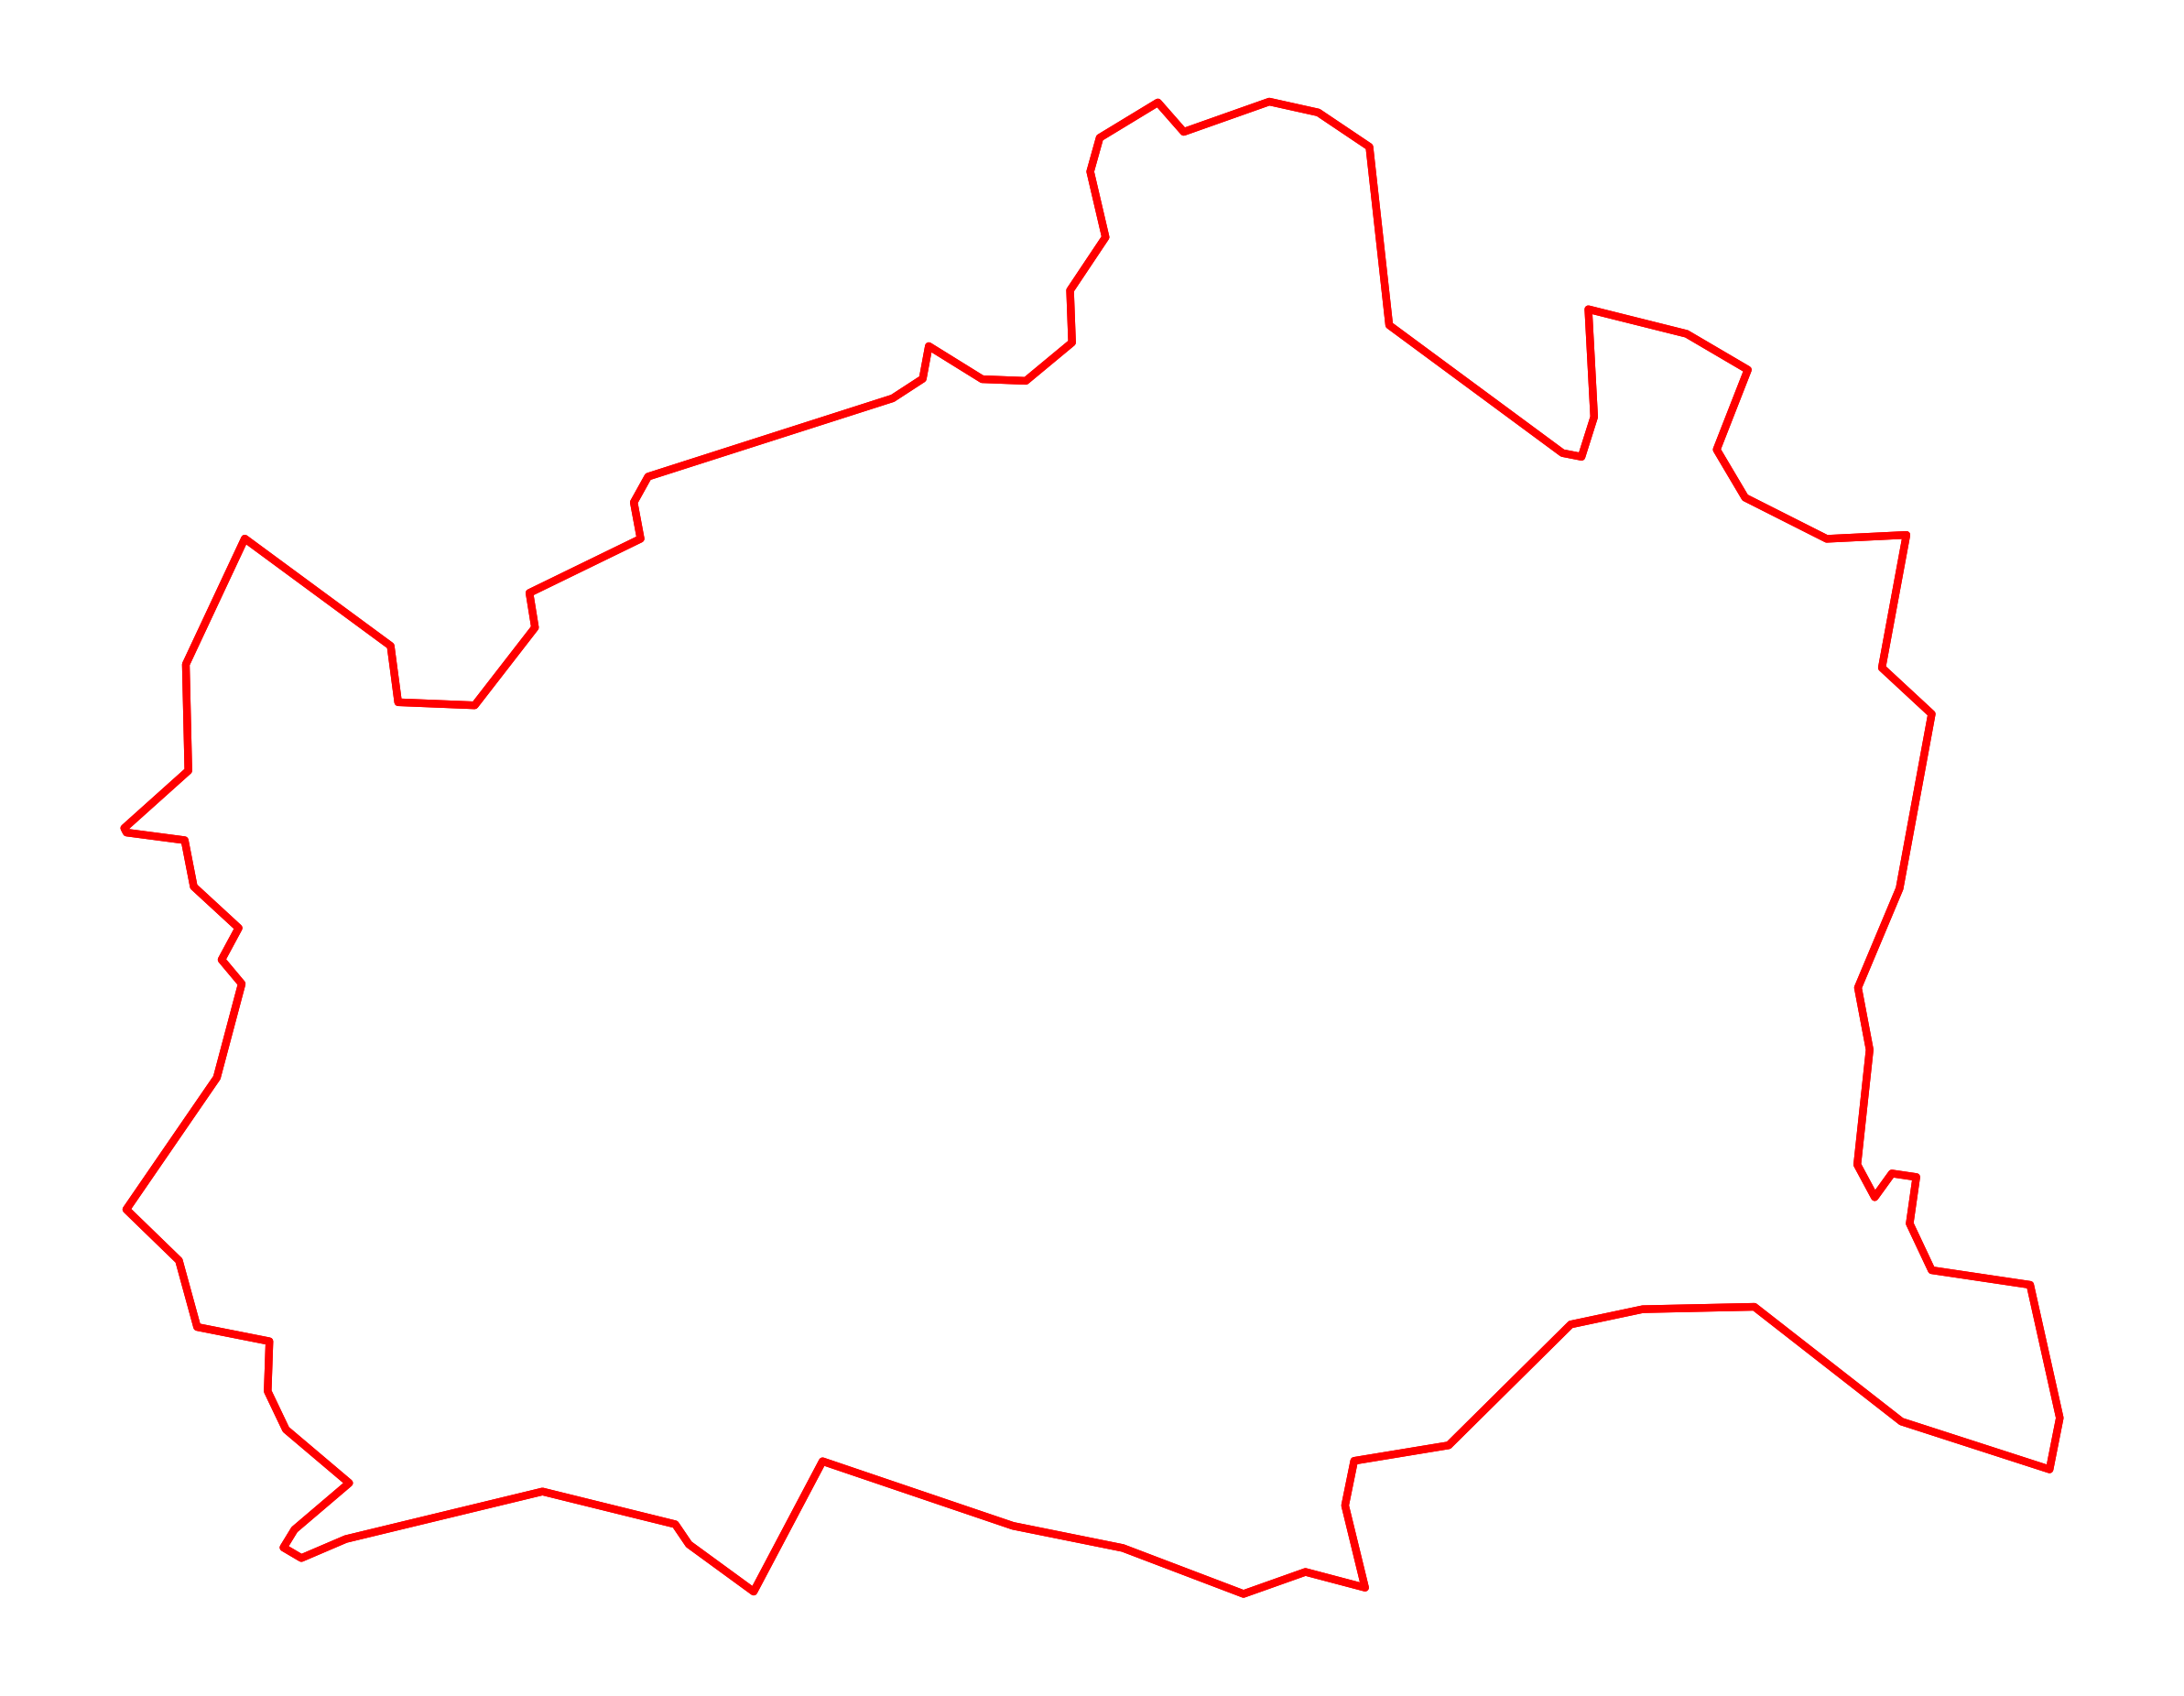

In [7]:
# Filter the region of interest based on the NUTS_ID string (if it contains that in the string)
filtered_gdf = gdf[gdf['NUTS_ID'].str.contains('AT13', na=False)].reset_index(drop=True)

# Example with multiple conditions (e.g. only NUTS level 3)
# filtered_gdf = gdf[gdf['NUTS_ID'].str.contains('AT13', na=False) & (gdf['LEVL_CODE'] == 3)].reset_index(drop=True)

# Example to select a single region by its exact NUTS_ID, for example "AT1301" (e.g., Eisenstadt-Umgebung).
# filtered_gdf = gdf[gdf['NUTS_ID'] == 'AT1301'].reset_index(drop=True)


print(filtered_gdf)

# Plot the see the boundaries here
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
filtered_gdf.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2)
ax.axis('off')
plt.show()

### Save the shape in the geojson format

In [7]:
filtered_gdf.to_file('boundaries_vienna.geojson', driver='GeoJSON')

print("GeoJSON correctly saved!")

GeoJSON correctly saved!
